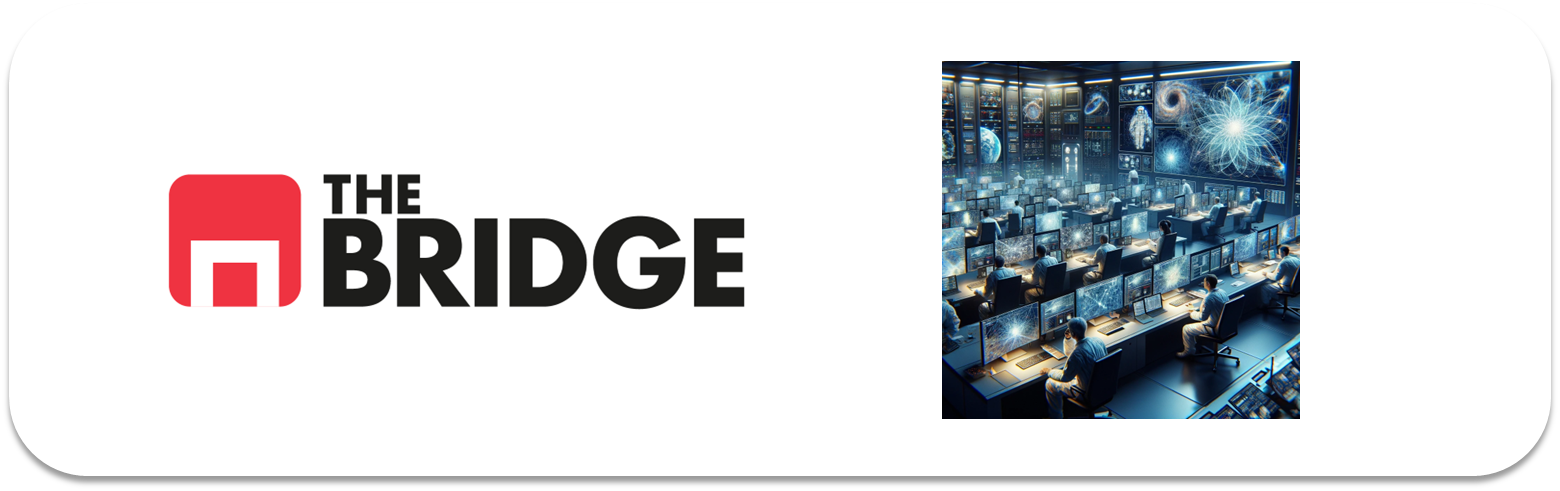

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [36]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [37]:
def load_images_from_directory(directory_path):
    image_data = []
    label_data = []
    
    for filename in os.listdir(directory_path):
        if filename.endswith((".jpg", ".png")):
            label = 1 if "dog" in filename.lower() else 0  
            image_path = os.path.join(directory_path, filename)
            image = load_img(image_path, target_size=(32, 32))
            image_array = img_to_array(image) / 255.0  
            image_data.append(image_array)
            label_data.append(label)
    
    return np.array(image_data), np.array(label_data)

In [38]:
train_folders = ['data/github_train_0', 'data/github_train_1', 'data/github_train_2', 'data/github_train_3']

In [39]:
train_images, train_labels = [], []

for folder in train_folders:
    images, labels = load_images_from_directory(folder)
    train_images.extend(images)
    train_labels.extend(labels)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [40]:
test_images, test_labels = load_images_from_directory('data/github_test')


In [41]:
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

In [42]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
train_history = cnn_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                              epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 3s 20ms/step - loss: 0.6883 - accuracy: 0.5328 - val_loss: 0.6602 - val_accuracy: 0.6210
Epoch 2/50
125/125 [==============================] - 2s 18ms/step - loss: 0.6480 - accuracy: 0.6140 - val_loss: 0.6276 - val_accuracy: 0.6490
Epoch 3/50
125/125 [==============================] - 2s 18ms/step - loss: 0.6127 - accuracy: 0.6662 - val_loss: 0.5912 - val_accuracy: 0.6830
Epoch 4/50
125/125 [==============================] - 2s 17ms/step - loss: 0.5713 - accuracy: 0.7003 - val_loss: 0.5961 - val_accuracy: 0.6820
Epoch 5/50
125/125 [==============================] - 2s 17ms/step - loss: 0.5222 - accuracy: 0.7400 - val_loss: 0.5513 - val_accuracy: 0.7260
Epoch 6/50
125/125 [==============================] - 2s 17ms/step - loss: 0.5067 - accuracy: 0.7505 - val_loss: 0.5593 - val_accuracy: 0.7230
Epoch 7/50
125/125 [==============================] - 2s 18ms/step - loss: 0.4490 - accuracy: 0.7857 - val_loss: 0.5413 - val_accuracy: 0.7300

In [44]:
predictions = cnn_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

print(classification_report(true_classes, predicted_classes))

32/32 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       500
           1       0.75      0.80      0.78       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



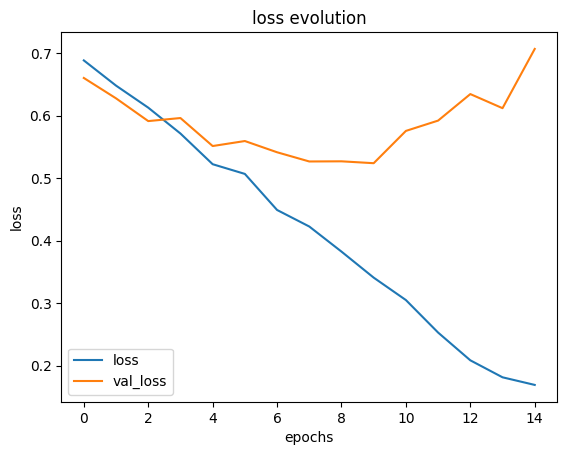

In [45]:
history_df = pd.DataFrame(train_history.history)
history_df[['loss', 'val_loss']].plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("loss evolution")
plt.show();

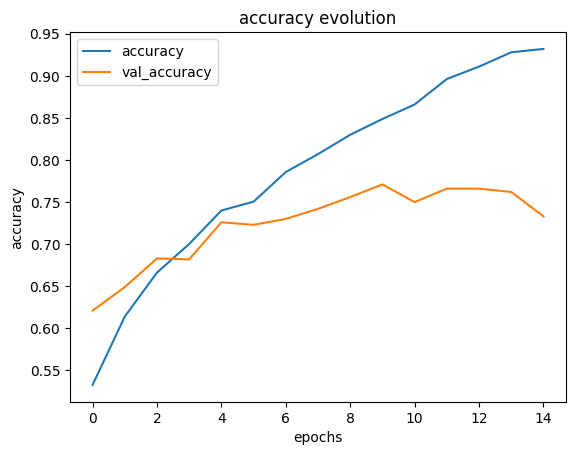

In [46]:
history_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy evolution')
plt.show();

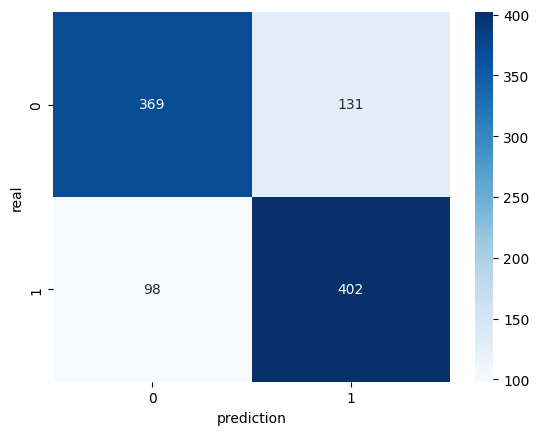

In [48]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('prediction')
plt.ylabel('real')
plt.show();

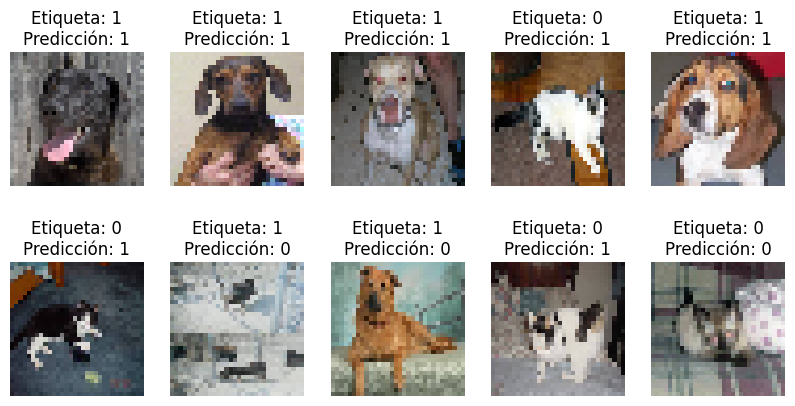

In [49]:
def display_images(images, labels, predictions=None, n_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(n_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        label = f"Etiqueta: {labels[i]}"
        if predictions is not None:
            label += f"\nPredicción: {predictions[i]}"
        plt.title(label)
        plt.axis('off')
    plt.show()

display_images(test_images[:10], true_classes[:10], predicted_classes[:10])